In [ ]:
import gensim
import gensim.downloader as download_api
russian_model = download_api.load('word2vec-ruscorpora-300')
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
import nltk
from nltk.tokenize import word_tokenize
!pip install pymorphy2 > None
import numpy as np
import pandas as pd
import matplotlib as plt
import re
import pandas as pd
import pymorphy2
from nltk.stem.snowball import RussianStemmer
from nltk.tokenize import word_tokenize
import nltk
from string import punctuation
nltk.download('stopwords')
from  sklearn.feature_extraction.text import TfidfVectorizer
from  sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from nltk import wordpunct_tokenize, WordNetLemmatizer, sent_tokenize, pos_tag
from nltk.corpus import stopwords as sw, wordnet as wn
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import string
import re
punctuations = list(punctuation)
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()
import nltk
nltk.download('punkt')
nltk.download('punkt')
tfidf_encoder = TfidfVectorizer()

[================----------------------------------] 32.8% 65.2/198.8MB downloaded

ContentTooShortError: <urlopen error retrieval incomplete: got only 68418913 out of 208427381 bytes>

In [ ]:
file_path = "df_vac.xlsx"
df_vacancies = pd.read_excel(file_path)
df_vacancies.head(2)

In [ ]:
file_path = "df_resumes.xlsx"
df_resumes = pd.read_excel(file_path)
df_resumes.head(2)

In [ ]:
file_path = "ratings_df.xlsx"
df_ratings = pd.read_excel(file_path)
df_ratings.head(2)

,id_resume,id_vacancy,rating
0,1,3856,1
1,1,1242,1


In [ ]:
pip install quantecon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numba import jit, float64
from numba.experimental import jitclass
import quantecon as qe
from quantecon.distributions import BetaBinomial

At time
t
, our worker has two choices:

Accept the offer and work permanently at constant wage
W
t
.

Reject the offer, receive unemployment compensation
c
, and reconsider next period.

The discount factor is
β
 lies in
(
0
,
1
)
. The smaller is
β
, the more the worker discounts future utility relative to current utility.


Variable
Y
t
 is income, equal to

his wage
W
t
 when employed
unemployment compensation
c
 when unemployed
he worker faces a trade-off:

Waiting too long for a good offer is costly, since the future is discounted.
Accepting too early is costly, since better offers might arrive in the future.

V
 must satisfy the Bellman Equation:
the first term is the lifetime payoff from accepting the current offer
the second term is the continuation value equal to the lifetime payoff from rejecting the current offer


V
(
w
)
=
max
{
w
1
−
β
,
c
+
β
n
∑
i
=
1

V
(
w
i
)
p
i
}


Policy of acception and rejection ：

σ
(
w
)
:=
1
{
w
1
−
β
≥
c
+
β
n
∑
i
=
1
V
(
w
i
)
p
i
}



Computing the Value Functions

Агент должен согласиться тогда и только тогда, когда текущее предложение о заработной плате превышает заработную плату при безработице (0) или его минимальную потребность.

Очевидно, что мы можем рассчитать эту заработную плату, если сможем вычислить функцию стоимости.

In [ ]:
from numba import jit, float64
from numba.experimental import jitclass
import quantecon as qe
from quantecon.distributions import BetaBinomial

In [ ]:
df_vacancies["company_sphere"].value_counts()

company_sphere
Другое                   4674
Инженерно-техническая    3056
Банки IT финансы          324
ИП                        274
Государственная сфера     168
Торговля                  163
IT                         57
Консалтинг                 18
Телеком                    12
Туризм                      9
Розничная торговля          7
Юридические фирмы           5
Name: count, dtype: int64

In [ ]:
df_merged = pd.merge(df_vacancies, df_ratings, on='id_vacancy', how='outer').fillna(0)
df_merged.head(4)
alpha = df_merged.groupby('company_sphere')['rating'].agg(lambda x: sum(x > 2) / len(x))
print(alpha)

NameError: name 'pd' is not defined

In [ ]:
alpha_list = list(alpha.values)
print(alpha_list)

[0.02834008097165992, 0.08637640449438203, 0.058091286307053944, 0.05426507905524107, 0.04030226700251889, 0.044226595824290955, 0.0, 0.03333333333333333, 0.08108108108108109, 0.0743801652892562, 0.023809523809523808, 0.0]


In [ ]:
betta =[6.7,4.5,1.9,3.8,0.8,2.8,0.87,0.56,0.67,1.2,0.9,0.23,0.98]

In [ ]:
n= df_vacancies["company_sphere"].value_counts().values
n

array([4674, 3056,  324,  274,  168,  163,   57,   18,   12,    9,    7,
          5])

In [ ]:
q_values = [BetaBinomial(n, a, b).pdf() for n,a,b in zip(n, alpha_list, betta)]

/usr/local/lib/python3.10/dist-packages/quantecon/distributions.py:95: RuntimeWarning: invalid value encountered in multiply
  probs = binom(n, k) * beta(k + a, n - k + b) / beta(a, b)
/usr/local/lib/python3.10/dist-packages/quantecon/distributions.py:95: RuntimeWarning: invalid value encountered in divide
  probs = binom(n, k) * beta(k + a, n - k + b) / beta(a, b)


In [ ]:
grouped = df_vacancies.groupby('company_sphere').agg({'Low_salary': ['mean', 'max']})
min_values = [round(grouped.loc[i, ('Low_salary', 'mean')]) for i in grouped.index]
max_values = [round(grouped.loc[i, ('Low_salary', 'max')]) for i in grouped.index]

print(min_values)
print(max_values)

[17895, 12765, 24315, 51506, 71967, 66211, 115889, 84286, 38333, 42755, 31111, 40000]
[100000, 250000, 200000, 850000, 800000, 700000, 280000, 175000, 200000, 260000, 120000, 70000]


In [ ]:

w_min, w_max = min_values, max_values
for i in range(len(w_min)):
   w_default = np.linspace(w_min[i], w_max[i], w_min[i]+1)
   print(w_default)

[ 17895.          17899.58815312  17904.17630623 ...  99990.82369377
  99995.41184688 100000.        ]
[ 12765.          12783.58480219  12802.16960439 ... 249962.83039561
 249981.41519781 250000.        ]
[ 24315.          24322.22537528  24329.45075057 ... 199985.54924943
 199992.77462472 200000.        ]
[ 51506.          51521.5029317   51537.00586339 ... 849968.99413661
 849984.4970683  850000.        ]
[ 71967.          71977.11620604  71987.23241208 ... 799979.76758792
 799989.88379396 800000.        ]
[ 66211.          66220.57226141  66230.14452281 ... 699980.85547719
 699990.42773859 700000.        ]
[115889.         115890.41610507 115891.83221013 ... 279997.16778987
 279998.58389493 280000.        ]
[ 84286.          84287.07626415  84288.1525283  ... 174997.8474717
 174998.92373585 175000.        ]
[ 38333.          38337.21743667  38341.43487335 ... 199991.56512665
 199995.78256333 200000.        ]
[ 42755.         42760.0811601  42765.1623202 ... 259989.8376798
 259994.9

In [ ]:
w_default_set = []

for i in range(len(w_min)):
  w_default = list(np.linspace(w_min[i], w_max[i], w_min[i]+1))
  w_default_set.append(w_default)

print(w_default_set)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(len(w_default_set))
print(len(q_values))

12
12


Оценка вероятности найма

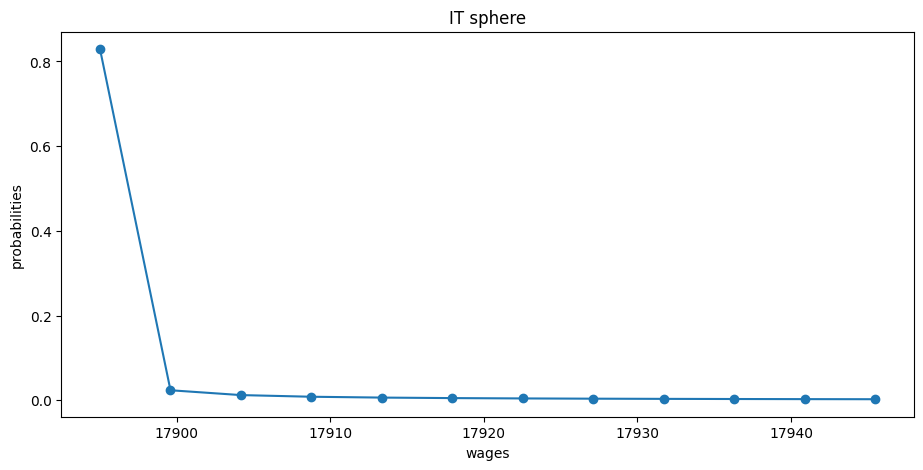

In [ ]:
step = 12
for i in range(0, 12, step):
   w_default_set_trimmed = w_default_set[0][i:i+step]
   q_values_trimmed = q_values[0][i:i+step]
   fig, ax = plt.subplots()
   ax.plot(w_default_set_trimmed, q_values_trimmed, '-o', label='$q(w(i))$')
   ax.set_xlabel('wages')
   ax.set_ylabel('probabilities')
   ax.set_title('IT sphere')

   plt.show()

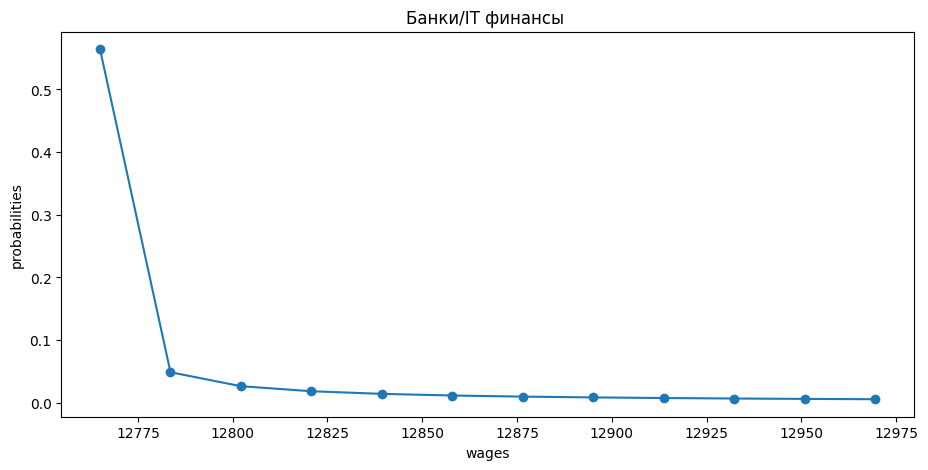

In [ ]:
step = 12
for i in range(0, 12, step):
   w_default_set_trimmed = w_default_set[1][i:i+step]
   q_values_trimmed = q_values[1][i:i+step]
   fig, ax = plt.subplots()
   ax.plot(w_default_set_trimmed, q_values_trimmed, '-o', label='$q(w(i))$')
   ax.set_xlabel('wages')
   ax.set_ylabel('probabilities')
   ax.set_title('Банки/IT финансы ')
   plt.show()

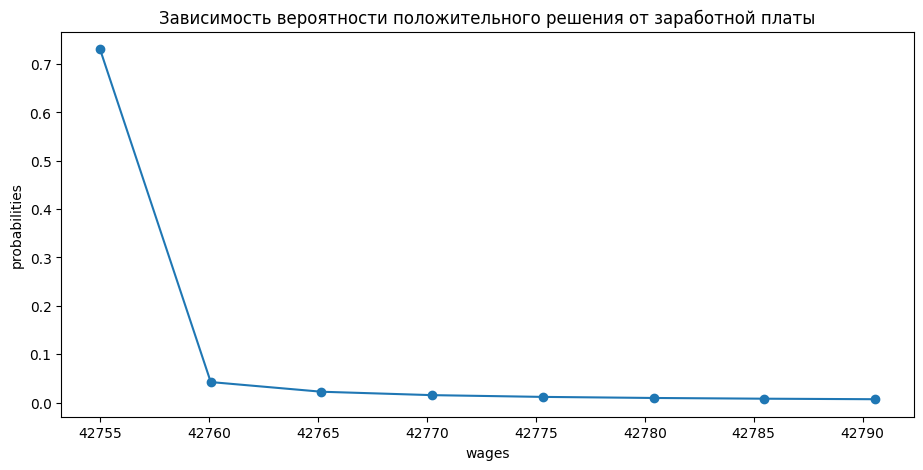

In [ ]:
step = 8
for i in range(0, 1, step):
   w_default_set_trimmed = w_default_set[9][i:i+step]
   q_values_trimmed = q_values[2][i:i+step]
   fig, ax = plt.subplots()
   ax.plot(w_default_set_trimmed, q_values_trimmed, '-o', label='$q(w(i))$')
   ax.set_xlabel('wages')
   ax.set_ylabel('probabilities')
   ax.set_title('Зависимость вероятности положительного решения от заработной платы')
   plt.show()

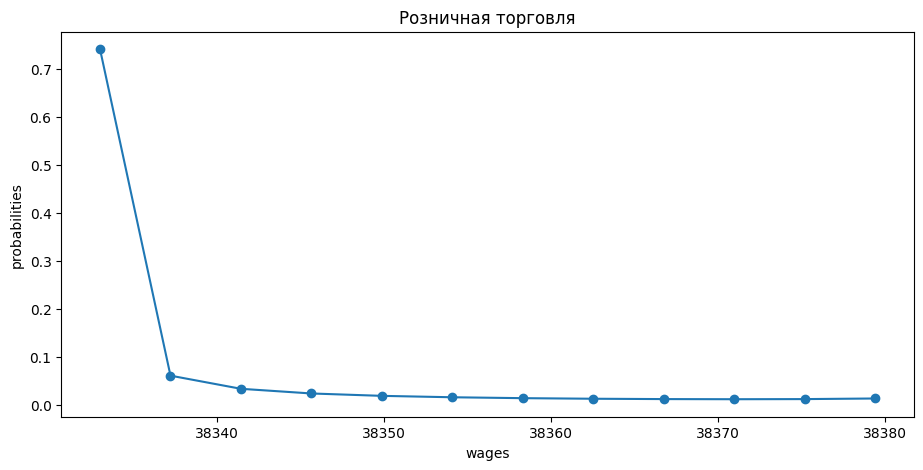

In [ ]:
step = 12
for i in range(0, 12, step):
   w_default_set_trimmed = w_default_set[8][i:i+step]
   q_values_trimmed = q_values[8][i:i+step]
   fig, ax = plt.subplots()
   ax.plot(w_default_set_trimmed, q_values_trimmed, '-o', label='$q(w(i))$')
   ax.set_xlabel('wages')
   ax.set_ylabel('probabilities')
   ax.set_title('Розничная торговля')
   plt.show()

In [ ]:
def lognormal_draws(n=1000, μ=100000, σ=50000, seed=1234):
    np.random.seed(seed)
    z = np.random.randn(n)
    w_draws = np.exp(μ + σ * z)
    return w_draws

In [ ]:
def compute_reservation_wage(mcm):
    """
    Computes the reservation wage of an instance of the McCall model
    by finding the smallest w such that v(w) >= h.

    If no such w exists, then w_bar is set to np.inf.
    """
    u = lambda x: np.log(x/2)

    v, d = solve_model(mcm)
    h = u(mcm.c) + mcm.β * d

    w_bar = np.inf
    for i, wage in enumerate(mcm.w_grid):
        if v[i] > h:
            w_bar = wage
            break

    return w_bar

In [ ]:
mccall_data_continuous = [
    ('c', float64),          # unemployment compensation
    ('α', float64),          # job separation rate
    ('β', float64),          # discount factor
    ('w_grid', float64[:]),  # grid of points for fitted VFI
    ('w_draws', float64[:])  # draws of wages for Monte Carlo
]

@jitclass(mccall_data_continuous)
class McCallModelContinuous:

    def __init__(self,
                 c=1,
                 α=0.1,
                 β=0.96,
                 grid_min=1e-10,
                 grid_max=5,
                 grid_size=100,
                 w_draws=lognormal_draws()):

        self.c, self.α, self.β = c, α, β

        self.w_grid = np.linspace(grid_min, grid_max, grid_size)
        self.w_draws = w_draws

    def update(self, v, d):

        # Simplify names
        c, α, β = self.c, self.α, self.β
        w = self.w_grid
        u = lambda x: np.log(x)

        # Interpolate array represented value function
        vf = lambda x: np.interp(x, w, v)

        # Update d using Monte Carlo to evaluate integral
        d_new = np.mean(np.maximum(vf(self.w_draws), u(c) + β * d))

        # Update v
        v_new = u(w) + β * ((1 - α) * v + α * d)

        return v_new, d_new

<ipython-input-28-ad29d2adfae1>:4: RuntimeWarning: overflow encountered in exp
  w_draws = np.exp(μ + σ * z)


In [ ]:
def solve_model(mcm, tol=1e-5, max_iter=2000):
    """
    Iterates to convergence on the Bellman equations

    * mcm is an instance of McCallModel
    """

    v = np.ones_like(mcm.w_grid)    # Initial guess of v
    d = 1                           # Initial guess of d
    i = 0
    error = tol + 1

    while error > tol and i < max_iter:
        v_new, d_new = mcm.update(v, d)
        error_1 = np.max(np.abs(v_new - v))
        error_2 = np.abs(d_new - d)
        error = max(error_1, error_2)
        v = v_new
        d = d_new
        i += 1

    return v, d

<ipython-input-28-ad29d2adfae1>:4: RuntimeWarning: overflow encountered in exp
  w_draws = np.exp(μ + σ * z)


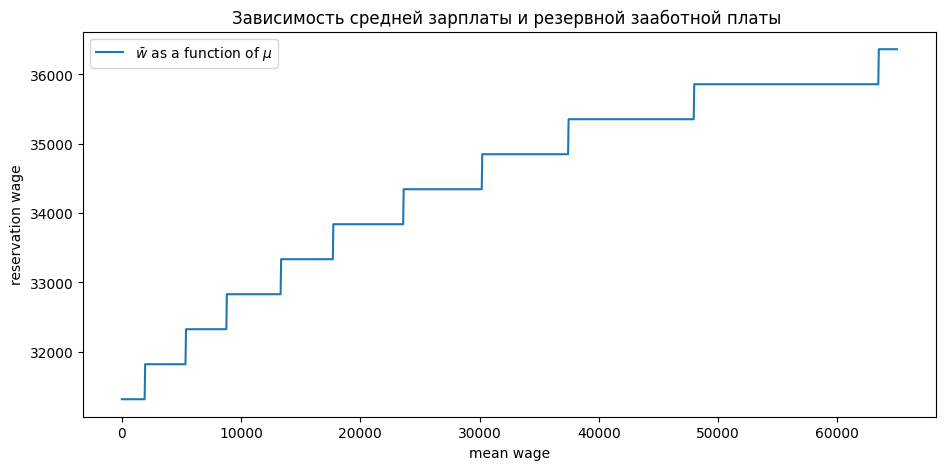

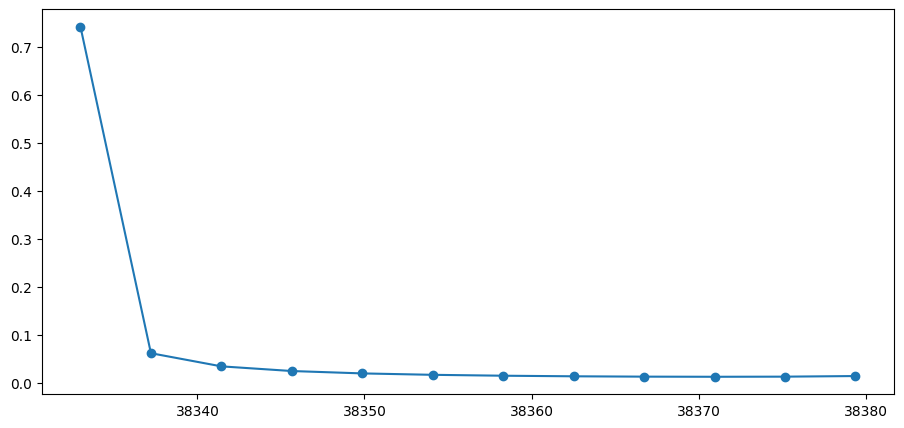

In [ ]:
mcm = McCallModelContinuous()
mu_vals = np.linspace(0.0, 65000, 1500)
w_bar_vals = np.empty_like(mu_vals)

fig, ax = plt.subplots()

for i, m in enumerate(mu_vals):
    mcm.w_draws = lognormal_draws(μ=m)
    w_bar = compute_reservation_wage(mcm)
    w_bar_vals[i] = w_bar

ax.set(xlabel='mean wage', ylabel='reservation wage')
ax.plot(mu_vals, w_bar_vals*10000, label=r'$\bar w$ as a function of $\mu$')
ax.legend()
ax.set_title('Зависимость средней зарплаты и резервной зааботной платы ')
fig, ax = plt.subplots()
ax.plot(w_default_set_trimmed, q_values_trimmed, '-o', label='$q(w(i))$')
plt.show()